<h3> Instructions </h3>
<br>
<p>1. Open the notebook file that needs to be copied and edited.<br>
2. Go to the "File" tab in the notebook's menu bar.<br>
3. Select "Save to Drive" to create a copy of the notebook in your own Google Drive.<br>
4. Once the notebook is saved to your Drive, open it for editing.<br>
<br>
To work on the exercises in the notebook, follow these steps:<br>
1. Read the instructions and explanations provided for each exercise carefully<br>
2. Write your code solutions for each exercise in the designated code cells.<br>
3. Download the images shared in the folder and upload them to the colab session<br>

Important Note: It is recommended to read and understand the exercises thoroughly, as questions related to this assignment may be asked in a quiz.</p>.

<h1 align = 'center'>Image Data : Analysis using numpy</h1>
<hr>
<br><p style="font-size:1.3em;">Reading images is one of the most common uses of a numpy array. An image can be represented as a 3 Dimensional numpy array. The color of every pixel in the image can be represented by 3 numbers, the RGB value of that pixel.</p>

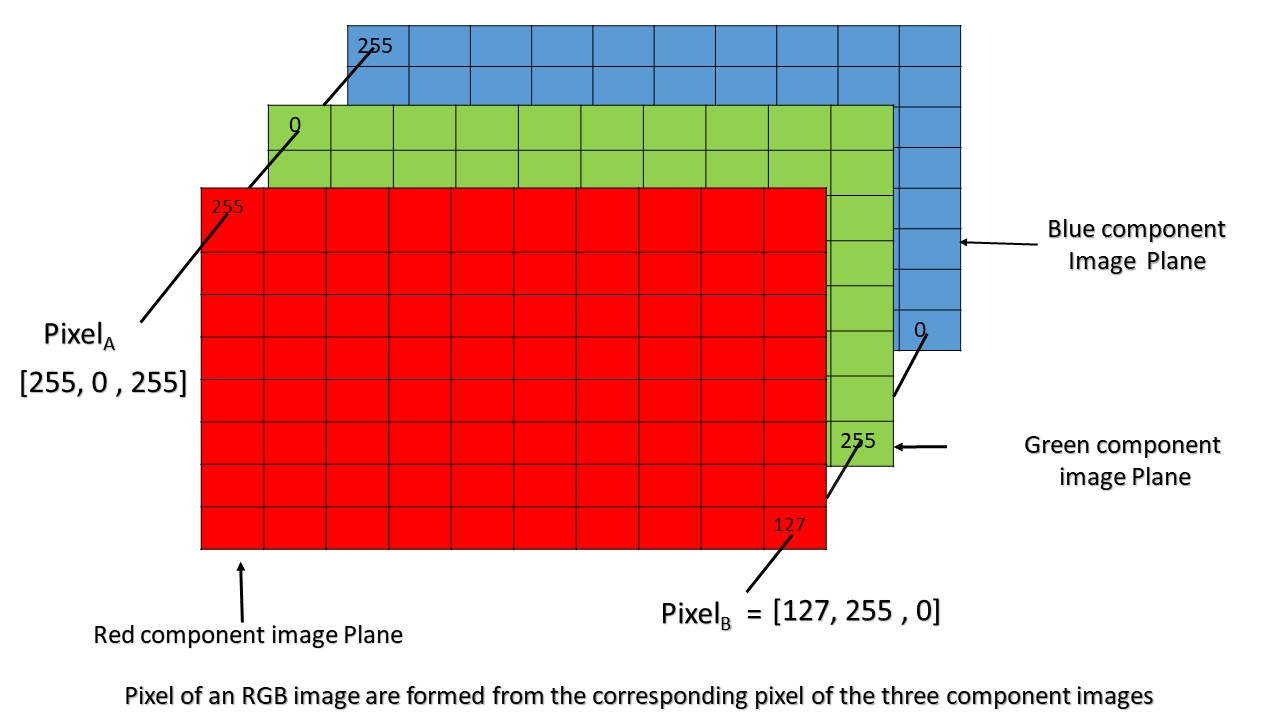

In [17]:
from IPython.display import Image
Image(filename='rgb.jpg' ,width=500)

<br>
<hr>

<p style="font-family: Arial; font-size:1.75em; font-style:bold">Loading the libraries we need: Numpy, Matplotlib</p>

In [18]:
import numpy as np                   #Numpy for all the computations
import matplotlib.pyplot as plt      #Matplotlib to display the images
%matplotlib inline

<p style="font-family: Arial; font-size:1.75em; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>


In [19]:
photo_data = plt.imread('Milky_way.jpg')  #Command to read images

<p style="font-size:1.3em;">Let's see what is in this image. </p>

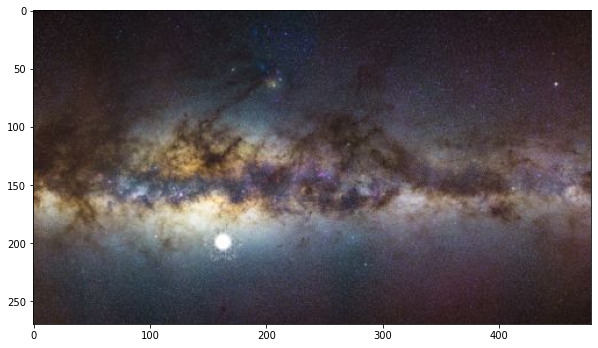

In [20]:
plt.figure(figsize=(10,10)) #Sets the size of the figure displayed
plt.imshow(photo_data);     #Command to display images

In [21]:
photo_data.size    #Total Number of pixels

388800

In [22]:
photo_data.min(),photo_data.max()   

(10, 255)

In [23]:
photo_data.shape

(270, 480, 3)

## Graded Task 1:
<p style="font-size:1.3em;">Find the value of the Red, Green and Blue channel at the 4 corners of the image<br><hr>

In [41]:
#Code Here
#[x,y] on a coordinate axis

print('Bottom Left',photo_data[0, 0])
print('Bottom Right',photo_data[0, 479])
print('Top Left',photo_data[269, 0])
print('Top Right',photo_data[269, 479])

print('Mid Point(s) are' , 270/2, 480/2)
print('Pixel Value are Mid Point(s) are', photo_data[134, 239])

Bottom Left [26 17 18]
Bottom Right [37 25 25]
Top Left [61 50 48]
Top Right [36 25 23]
Mid Point(s) are 135.0 240.0
Pixel Value are Mid Point(s) are [110  87 107]


#### Lets now try to visualize the RGB channels of the image separately.<br>
<p style="font-size:1em;">
We do that by first creating 3 copies of the image for the red, blue and green channels respectively.<br>
We then set the green and blue channels to zero in the red image.<br>
Similar procedures are followed to generate the other images.<br>
Finally, we concatenate the images to display them at the same time.<br>

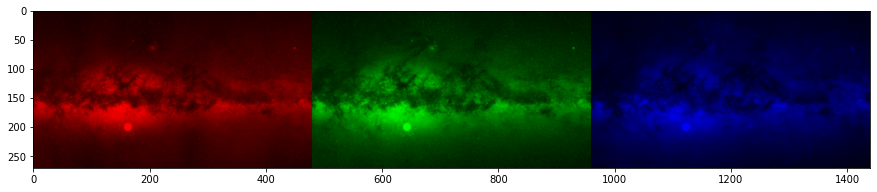

In [25]:
img_R, img_G, img_B = photo_data.copy(), photo_data.copy(), photo_data.copy()  #Creating 3 copies
img_R[:, :, (1, 2)] = 0   #Setting the blue and green channels to 0
img_G[:, :, (0, 2)] = 0   #Setting the red and blue channels to 0
img_B[:, :, (0, 1)] = 0   #Setting the red and green channels to 0


img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)   #Concatenating the images to view them at once
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

## Graded Task 2:<br>
Following a similar procedure as above, create an image by removing the red channel from the given channel only, leaving the blue and green channels intact.<br>
<hr>

Bottom Left [ 0 17 18]
Bottom Right [ 0 25 25]
Top Left [ 0 50 48]
Top Right [ 0 25 23]


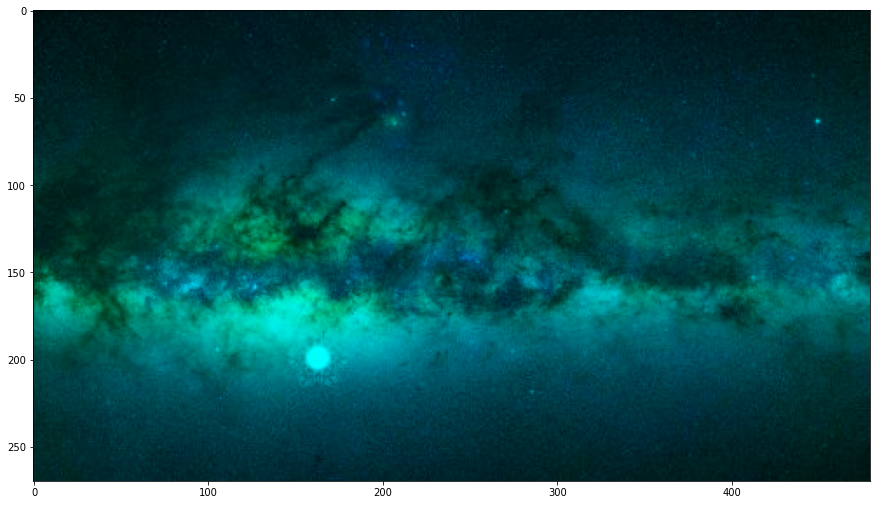

In [26]:
#Code Here
img = photo_data.copy()
img[:, :, (0)] = 0   


plt.figure(figsize=(15, 15))
plt.imshow(img)

print('Bottom Left',img[0, 0])
print('Bottom Right',img[0, 479])
print('Top Left',img[269, 0])
print('Top Right',img[269, 479])

## Now we make some basic edits to the image

### a) Cropping

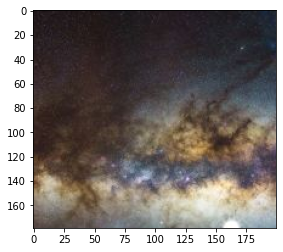

In [27]:
crop_img = photo_data[20:199,:200,:]     
imgplot = plt.imshow(crop_img)

### b) Grayscale.
We can also use NumPy for transforming the image into a grayscale image.<br>
We have set weighted means for each of the channels and we create a grayscale image by taking a dot product with the weights

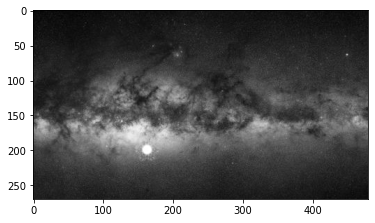

In [28]:
grayscale_image = photo_data.mean(axis = 2)     #Computing the mean across the channel axis
imgplot = plt.imshow(grayscale_image , cmap = "gray")  

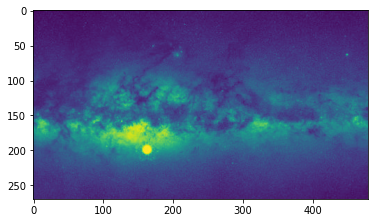

In [29]:
rgb_weights = [0.2989, 0.5870, 0.1140]                #Mean weights of the rgb channels
grayscale_image = np.dot(photo_data, rgb_weights)     #Dot product
imgplot = plt.imshow(grayscale_image )                #cmap = "gray"

## What is the difference between the 2 codes for converting a colored image to grayscale?
Check this out to find more: https://e2eml.school/convert_rgb_to_grayscale.html

### c) Simple Filters

We start with a filter to reduce very bright pixels. Any pixel where the blue pixel has a value greater than 150, we clip to 150.


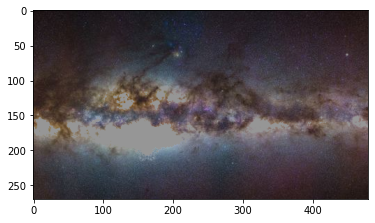

In [30]:
img_150 = (photo_data[:,:,0] > 150)      #Boolean array having true false values based on the condition
img=photo_data.copy()
img[img_150]=150                         #Clipping the value to a 150 where the img_150 is true
plt.imshow(img)

# Graded Task 3:
Create a filter for the image which sets all the pixels lesser than 50 in the Red Channel, to 0.
Figure out how to save the image and upload the image to your Google Drive.<br>
Enter the link to the drive in the form that will be floated.<br>
Make sure to have the drive link viewable to everyone.

<hr>

270


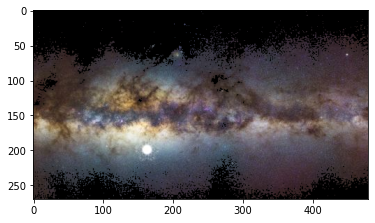

In [43]:
import cv2

img_50 = (photo_data[:,:,(0)] < 50)  
print(len(img_50))
img=photo_data.copy()
img[img_50]=0                      
plt.imshow(img)

plt.savefig('GradedTask3')

## Graded Task 4:
<p>Create a filter for the image which sets all the pixels lesser than 150 in the Grayscale image to 0 and others to 255. This technique is commonly as Binarization (Black and White).<br>
Figure out how to save the image and upload the image to your Google Drive.<br>
Enter the link to the drive in the form that will be floated.<br>
Make sure to have the drive link viewable to everyone.<br></p>
<hr>

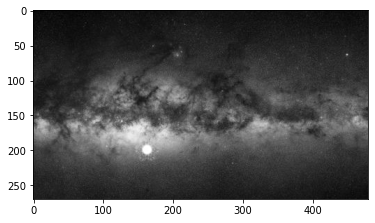

In [32]:
grayscale_image = photo_data.mean(axis = 2)     #Computing the mean across the channel axis
imgplot = plt.imshow(grayscale_image , cmap = "gray")  

10.969328703703704


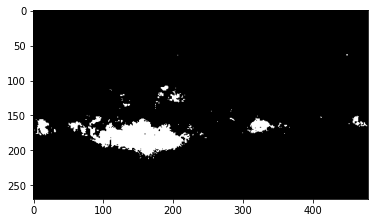

In [46]:
binary_image = np.copy(grayscale_image)

# Set pixels less than 150 to 0 and others to 255
binary_image[binary_image < 150] = 0
binary_image[binary_image >= 150] = 255

plt.imshow(binary_image, cmap = 'gray')

plt.savefig('GradedTask4')

print(binary_image.mean())

In [35]:
binary_image.shape

(270, 480)

<h3>OPTIONAL</h3> ( BONUS :) )

You may notice that binarized image has lost the clarity in features compared to that in grayscale image. Can you improve the clarity? Follow the comments to complete the function and try it out.

In [72]:
def floyd_steinberg(im_gs):
    """
    Implements the Floyd steinberg algorithm to create binary image from grayscale image
    """
    #copy the input image (im_gs) as im_temp and assign binarization threshold as thres = 255//2

    for row in range(0,im_gs.shape[0]-1):
        for col in range(1,im_gs.shape[1]-1):
            old = im_temp[row, col]
            
            # write an if else loop to binarize current (row,col) pixel in im_temp

            quant_error = old - im_temp[row, col]
            im_temp[row, col+1] = im_temp[row, col+1] + quant_error * 7 /16
            im_temp[row+1, col-1] = im_temp[row+1, col-1] + quant_error * 3 /16
            im_temp[row+1, col] = im_temp[row+1, col] + quant_error * 5 /16
            im_temp[row+1, col+1] = im_temp[row+1, col+1] + quant_error * 1 /16

    #Now finally binarize the im_temp image

    return im_temp

Text(0.5, 1.0, 'TAN')

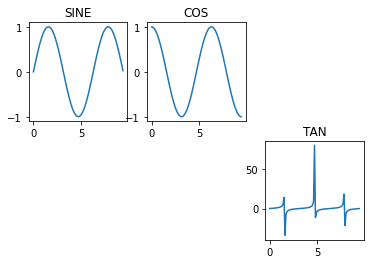

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 3*np.pi, 0.1)

y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.subplot(2,3,1)
plt.plot(x,y1)
plt.title('SINE')

plt.subplot(2,3,2)
plt.plot(x,y2)
plt.title('COS')

plt.subplot(2,3,6)
plt.plot(x,y3)
plt.title('TAN')

In [75]:
x = np.array([[1, 2], [3, 4], [2, 2], [9, 6]])

print(np.sum(x))
print(np.sum(x, axis =0))
print(np.sum(x, axis =1))

29
[15 14]
[ 3  7  4 15]


In [77]:
import pandas as pd
S1 = pd.Series(data = [31,2,-6], index = [7,9,3,2])
print(S1)

ValueError: Length of values (3) does not match length of index (4)

In [78]:
class Student :
    def __init__(self, id, age):
        self.id = id
        self.age = age
        
std = Student(1,20)

In [79]:
std

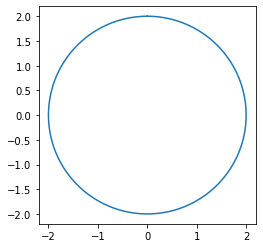

In [83]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 150)

radius = 2.0

a = radius*np.sin(theta)
b = radius*np.cos(theta)

figure,axes = plt.subplots(1)

axes.plot(a,b)
axes.set_aspect(1)

plt.show()